# Titanic: Machine Learning from Disaster

## Introduction

This notebook is aimed to tackle one of the most popular and important Kaggle challenges- [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). Also, this notebook serves as an end-to-end data science walkthrough, which covers the following sections:

- Data Cleaning & Formatting
- Exploratory Data Analysis
- Feature Engineering
- Modeling

Required Dependencies:
- numpy
- scipy
- pandas
- matplotlib
- seaborn
- scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
pd.options.mode.chained_assignment = None

## 1. Load & Check Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_len=train.shape[0]
testId = test['PassengerId']

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


`Age`, `Cabin` and `Embarked` columns contain missing values

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
y = train.Survived

Drop `Survived` and `PassengerId`, since they won't be the features we need.

In [7]:
X = train.drop(['Survived','PassengerId'],axis=1)

In [8]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`Embarked` has only two missing values, so just fill them with the entry appearing the most, in this case `'S'`.

In [9]:
X.Embarked.fillna('S',inplace=True)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are also missing values in our test data, we first fill the missing one in `Fare` with mean value.

In [11]:
test.Fare.fillna(test.Fare.mean(),inplace=True)

## 2. Exploratory Data Analysis & Feature Engineering

First thing first, we look at how our target is distributed

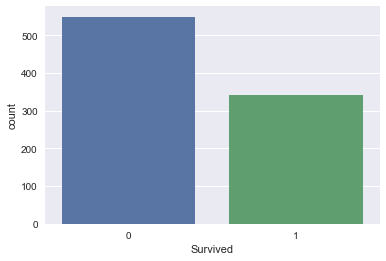

In [12]:
sns.countplot(x=y)

We can see `Not Survived` data is roughly 1.5 times more than `Survived`, and with the amount of data we have, we might suffer from imbalanced dataset situation, but let's look at relations of other features first.

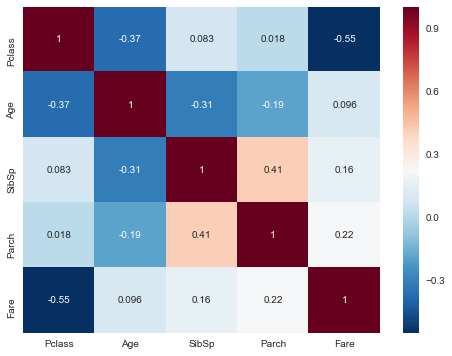

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(),annot=True,cmap = 'RdBu_r')

### Sex, Embarked, Pclass

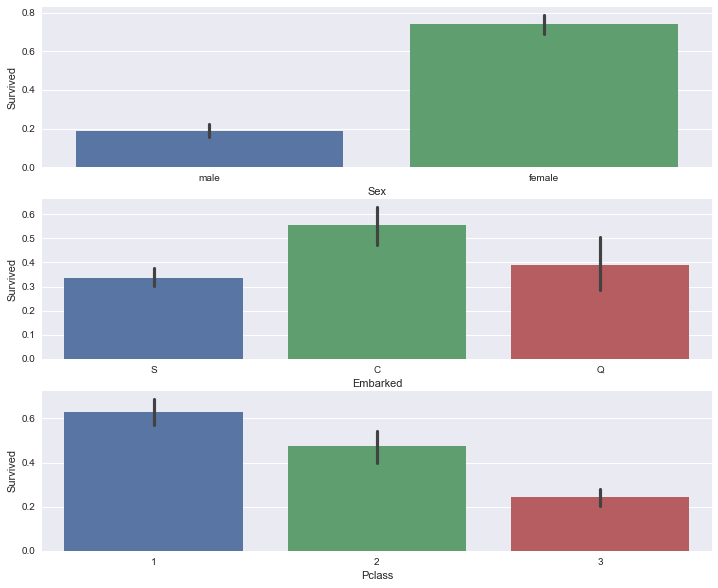

In [14]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
sns.barplot(x="Sex",y='Survived',data=train,ax=ax1)
sns.barplot(x="Embarked",y='Survived',data=train,ax=ax2)
sns.barplot(x="Pclass",y='Survived',data=train,ax=ax3)

We can clearly see that female survival rate is much higher than that of male, which indicates when evacuating the passengers on the cruise, females are evacuated first. Also, `Pclass` plot implies people with higher social class are evacuated earlier than lower classes.

### Age, Fare

<Figure size 576x432 with 0 Axes>

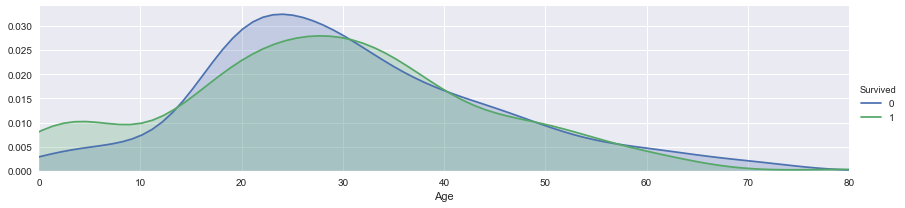

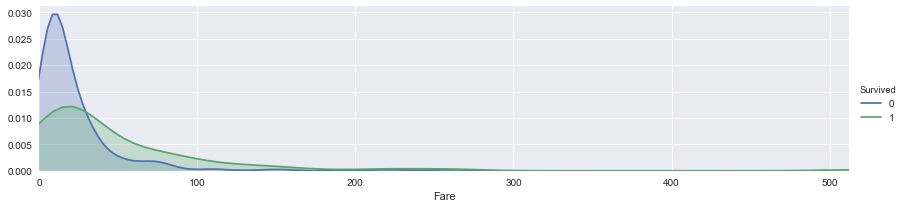

In [15]:
fig = plt.figure(figsize=(8, 6))
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

`Age` : Survival rate of lower ages is higher than that of higher ages, implying kids are probably evacuated first too.

`Fare`: "Not Survived" number is way more than "Survived" in lower fares region, and is lower as fares go higher.


Moreover, we find the distribution of `Fares` to be pretty skewed.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


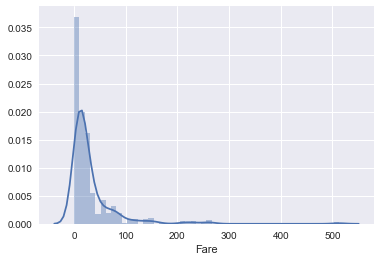

In [19]:
sns.distplot(X['Fare'])

#### Box-Cox Transformation
We can use a lot of methods to transform a skewed distribution, such as log-transform and Box-Cox transformation, here we'll use Box-Cox transformation, documents could be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html).
To check normality, we can use Scipy's probplot, the closer the data points are around the straight line, the more normal the distribution is.

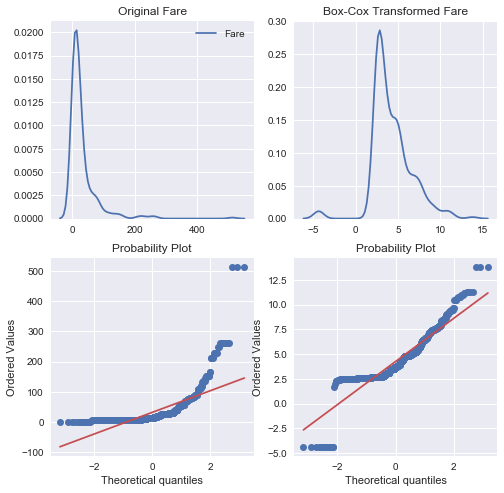

In [30]:
from scipy.stats import boxcox, probplot
boxcox_fare=boxcox(1e-10+X['Fare'])[0]
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.title("Original Fare")
sns.kdeplot(X['Fare'])
plt.subplot(222)
plt.title("Box-Cox Transformed Fare")
sns.kdeplot(boxcox_fare)
plt.subplot(223)
probplot(X['Fare'],plot=plt)
plt.subplot(224)
probplot(boxcox_fare,plot=plt)
X['Boxcox_Fare']=boxcox_fare
test['Boxcox_Fare']=boxcox(1e-10+test['Fare'])[0]

#### Fill missing value in Age

In [23]:
missing_age=X[X["Age"].isnull()].index
missing_age_te=test[test["Age"].isnull()].index

What will happen if all missing values is filled with mean value?

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


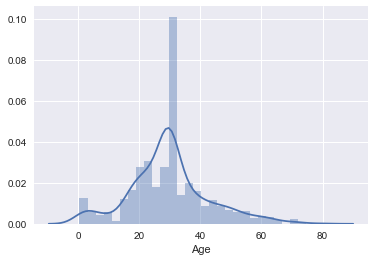

In [24]:
sns.distplot(X['Age'].fillna(X.Age.mean()))

Entries with mean age will be much more than others.

Instead of filling all missing ages with mean age value, we suppose people with same family members and ticket fare to be of the same age and it's implemented as follows.

In [25]:
for i in missing_age:
    X["Age"][i]=X[(X['Family']==X.iloc[i]['Family'])&(X['Fare']==X.iloc[i]['Fare'])]['Age'].mean()
    if np.isnan(X["Age"][i]):
        X["Age"][i]=X["Age"].mean()
for i in missing_age_te:
    test["Age"][i]=test[(test['Family']==test.iloc[i]['Family'])&(test['Fare']==test.iloc[i]['Fare'])]['Age'].mean()
    if np.isnan(test["Age"][i]):
        test["Age"][i]=test["Age"].mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


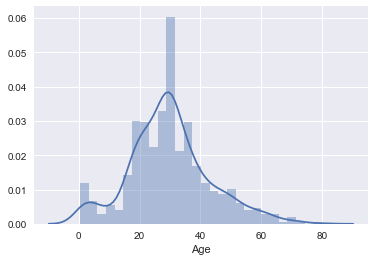

In [26]:
sns.distplot(X['Age'])

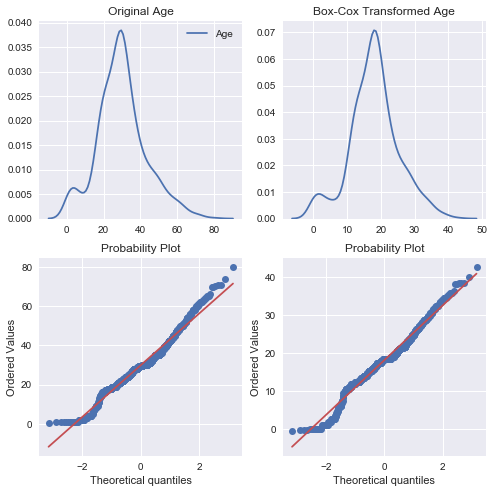

In [29]:
boxcox_age=boxcox(X['Age'])[0]
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.title("Original Age")
sns.kdeplot(X['Age'])
plt.subplot(222)
plt.title("Box-Cox Transformed Age")
sns.kdeplot(boxcox_age)
plt.subplot(223)
probplot(X['Age'],plot=plt)
plt.subplot(224)
probplot(boxcox_age,plot=plt)
X['Boxcox_Age']=boxcox_age
test['Boxcox_Age']=boxcox(test['Age'])[0]

### Outlier Detection

Outliers in dataset can significantly affect the performance of our model, for they might have some extreme or erroneous values due to either wrong documentation or simply because they are special and if it's the latter, we shouldn't take them out from our training dataset, otherwise just remove them.

To define what an outlier is, I use the `IQR Rule`, where values outside the range of `1st Quartile-1.5*(3rd Quantile-1st Quantile)` and `3rd Quartile+1.5*(3rd Quantile-1st Quantile)` are defined as outliers.

In [31]:
def detect_outlier(col,data):
    Q1=np.percentile(data[col],25)
    Q3=np.percentile(data[col],75)
    IQR=Q3-Q1
    return data[(data[col]<Q1-1.5*IQR)|(data[col]>Q3+1.5*IQR)].index

In [32]:
fare_outlier=detect_outlier("Fare",X)
age_outlier=detect_outlier("Age",X)
X.loc[(fare_outlier&age_outlier)]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Boxcox_Fare,Boxcox_Age
195,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C,0,9.280917,32.544951
268,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S,1,9.425809,32.544951
275,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,1,7.450839,34.905225
305,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,3,9.386403,-0.080605
366,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.00,1,0,110813,75.2500,D37,C,1,7.355864,33.493359
438,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S,5,11.229299,35.373090
587,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,B41,C,2,7.493533,33.493359
659,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,D48,C,2,8.502640,32.544951
745,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.0000,B22,S,2,7.201360,38.153049
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,S,0,7.520767,34.435999


These are the outliers in the aspects of `Fare` and `Age` and since they don't look like wrong so we'll leave them in our dataset.

### Parch, SibSp

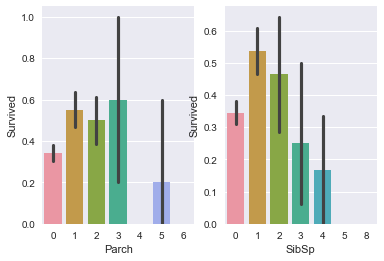

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.barplot(x="Parch",y='Survived',data=train,ax=ax1)
sns.barplot(x="SibSp",y='Survived',data=train,ax=ax2)

Add a feature called `Family`

In [17]:
X['Family']=X['Parch']+X['SibSp']
test['Family']=test['Parch']+test['SibSp']

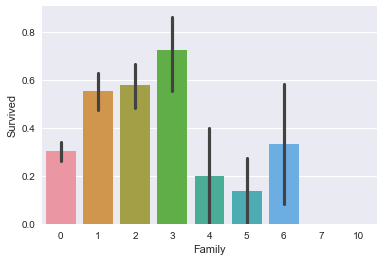

In [18]:
sns.barplot(x="Family",y=y,data=X)

### Cabin, Ticket, Name

There are a lot of missing values in the Cabin column, but instead of dropping this feature, I decide to fill it somehow using its relation to Ticket.

In [33]:
print(X[X["Ticket"]=='19950']["Cabin"])
print(X[X["Ticket"]=='PC 17558']["Cabin"])
print(X[X["Ticket"]=='230136']["Cabin"])

27     C23 C25 C27
88     C23 C25 C27
341    C23 C25 C27
438    C23 C25 C27
Name: Cabin, dtype: object
118    B58 B60
299    B58 B60
Name: Cabin, dtype: object
183    F4
618    F4
Name: Cabin, dtype: object


From the above, entries with the same Ticket tend to have the same Cabin, with only a few exceptions, so I'll fill the missing values with those whose Ticket is the same, and if such entries don't exist, fill it with 'X'.

In [34]:
missing_cabin=X[X["Cabin"].isnull()].index
missing_cabin_te=test[test["Cabin"].isnull()].index
for i in missing_cabin:
    if (X['Ticket']==X.iloc[i]['Ticket']).sum()!= 1:
        if not pd.isnull(X[X["Ticket"]==X.iloc[i]["Ticket"]].iloc[0]["Cabin"]):
            X["Cabin"][i]=X[X["Ticket"]==X.iloc[i]["Ticket"]].iloc[0]["Cabin"]
        else:
            X["Cabin"][i]='X'
    else:
        X["Cabin"][i]='X'
for i in missing_cabin_te:
    if (test['Ticket']==test.iloc[i]['Ticket']).sum()!= 1:
        if not pd.isnull(test[test["Ticket"]==test.iloc[i]["Ticket"]].iloc[0]["Cabin"]):
            test["Cabin"][i]=test[test["Ticket"]==test.iloc[i]["Ticket"]].iloc[0]["Cabin"]
        else:
            test["Cabin"][i]='X'
    else:
        test["Cabin"][i]='X'

In [35]:
X['Cabin']=X['Cabin'].apply(lambda x:x[0])
test['Cabin']=test['Cabin'].apply(lambda x:x[0])

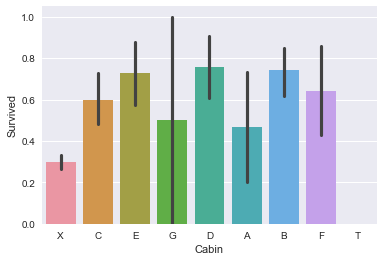

In [36]:
sns.barplot(X['Cabin'],y=y)

In [37]:
X['Name']=X['Name'].apply(lambda x:x.split(",")[1].split('.')[0].strip())
test['Name']=test['Name'].apply(lambda x:x.split(",")[1].split('.')[0].strip())

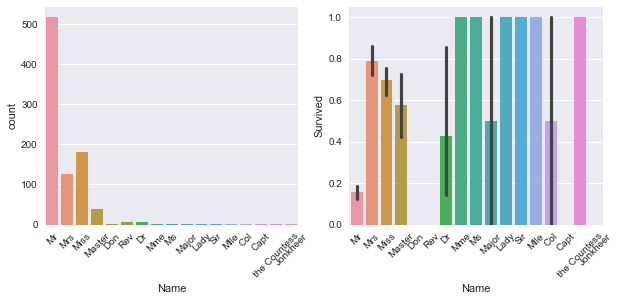

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(121)
c=sns.countplot(X['Name'])
plt.setp(c.get_xticklabels(), rotation=45)
plt.subplot(122)
b=sns.barplot(X['Name'],y)
plt.setp(b.get_xticklabels(), rotation=45)
plt.show()

Entries with 'Mr' are the most in our dataset, however their survival rate is only higher than those with zero survival rate, which again indicates the "Women and children first" evacuation policy. For entries with 'Rev','Dr','Capt','Jonkheer', though the number of entries is small, their survival rate is high. Similarly for all other prefixes, according to their occurences and survival rate, we assign different classes.

In [39]:
for i in range(len(X['Name'])):
    if X['Name'][i] in ['Mrs','Miss','Master']:
        X['Name'][i]='Many_High'
    elif X['Name'][i] in ['Mme','Dr','Ms','Major','Lady','Sir','Mlle','Col','the Countess']:
        X['Name'][i]='Rare_High'
    elif X['Name'][i] in ['Don','Rev','Capt','Jonkheer']:
        X['Name'][i]='Rare_Low'
for i in range(len(test['Name'])):
    if test['Name'][i] in ['Mrs','Miss','Master']:
        test['Name'][i]='Many_High'
    elif test['Name'][i] in ['Mme','Dr','Ms','Major','Lady','Sir','Mlle','Col','the Countess']:
        test['Name'][i]='Rare_High'
    elif test['Name'][i] in ['Don','Rev','Capt','Jonkheer']:
        test['Name'][i]='Rare_Low'

In [40]:
X.drop(['Ticket'],1,inplace=True)
test.drop(['Ticket'],1,inplace=True)

#### One-hot encoding categorical values

In [42]:
dummies = pd.get_dummies(X[["Name",'Sex','Cabin','Embarked']])
X = pd.concat([X,dummies],axis=1)
X.drop(["Sex",'Name','Cabin','Embarked','Name'],axis=1,inplace=True)
test_dummies = pd.get_dummies(test[['Name','Sex','Cabin','Embarked']])
test = pd.concat([test,test_dummies],axis=1)
test.drop(["Sex",'Name','Cabin','Embarked','Name'],axis=1,inplace=True)

#### Normalize data

In [43]:
from sklearn.preprocessing import MinMaxScaler
X[['Pclass','SibSp','Parch','Age','Fare','Family','Boxcox_Fare','Boxcox_Age']] = MinMaxScaler().fit_transform(X[['Pclass','SibSp','Parch','Age','Fare','Family','Boxcox_Fare','Boxcox_Age']])
test[['Pclass','SibSp','Parch','Age','Fare','Family','Boxcox_Fare','Boxcox_Age']] = MinMaxScaler().fit_transform(test[['Pclass','SibSp','Parch','Age','Fare','Family','Boxcox_Fare','Boxcox_Age']])

## MODELING

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#### Gaussian Naive Bayes

In [46]:
nb=GaussianNB()
y_pred=nb.fit(X_train,y_train).predict(X_test)
sum(y_pred==y_test)/len(y_test)

0.4301675977653631

#### Decision Tree

In [47]:
tree=DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
sum(y_pred==y_test)/len(y_test)

0.8268156424581006

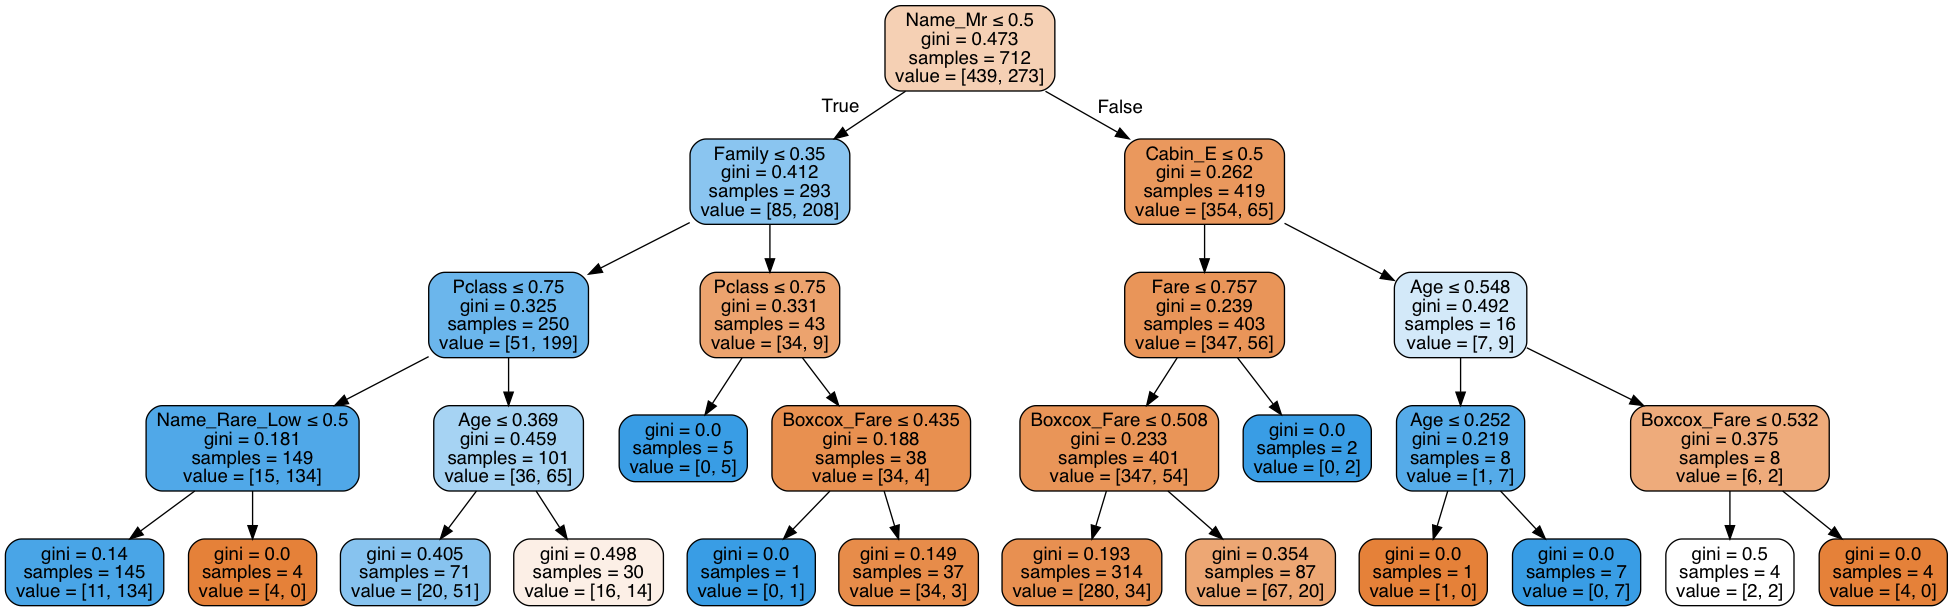

In [48]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision Tree Feature Importance

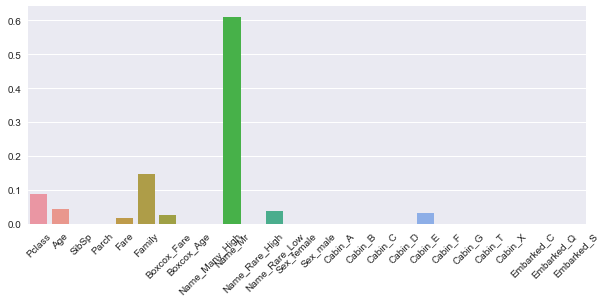

In [49]:
plt.figure(figsize=(10,4))
features=sns.barplot(X.columns,tree.feature_importances_)
plt.setp(features.get_xticklabels(), rotation=45)
plt.show()

#### Random Forest

Best n_estimator: 220,accuracy: 0.8491620111731844


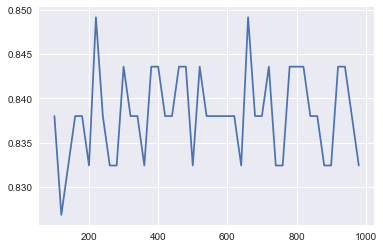

In [50]:
n_estimators=range(100,1000,20)
best_accuracy=best_n=0
accuracies=[]
final_pred=None
for n in n_estimators:
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(X_train,y_train)
    y_pred=forest.predict(X_test)
    accuracy=sum(y_pred==y_test)/len(y_test)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_n=n
    accuracies.append(accuracy)
plt.plot(n_estimators,accuracies)
print("Best n_estimator: {0},accuracy: {1}".format(best_n,best_accuracy))

### Binary Classification

For binary classification, what's more than accuracy is what exactly do we predict and output for both classes, so instead of merely looking at accuracy, we should also look at the confusion matrix.

In [51]:
import itertools
def plot_confusion_matrix(matrix,title):
    ax=plt.axes()
    ax.grid(False)
    plt.imshow(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues)
    plt.xticks([0,1],[0,1])
    plt.yticks([0,1],[0,1])
    plt.title(title,{'fontsize':14})
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, matrix[i, j],
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar()
    plt.show()

             precision    recall  f1-score   support

          0       0.83      0.91      0.87       110
          1       0.83      0.70      0.76        69

avg / total       0.83      0.83      0.82       179



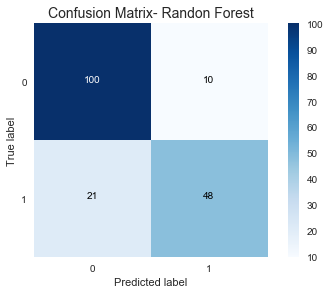

In [52]:
rf=RandomForestClassifier(n_estimators=180).fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred),'Confusion Matrix- Randon Forest')

#### Classification Report
precision: tp/(tp+fp)

recall: tp/(tp+fn)

- tp: True Positive -> predict True & actual True
- fp: False Positive -> predict True & actual False
- fn: False Negative -> predict False & actual True

From the classification report, we see that recall of 0 class is 20% higher than 1 class, which is resulted from the fact that the number of 0 class in our training data is much more than 1 class.

Moreover, instead of accuracy, in binary classification, we care more about the `ROC Curve` and `AUC`, whose document could be found [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). So we'll plot the ROC curve and output the calculated AUC.

AUC: 0.8861001317523056


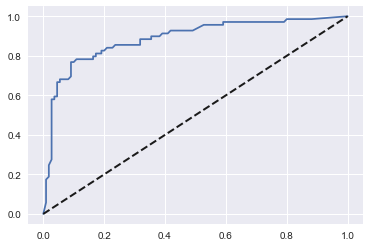

In [53]:
y_score=rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
print("AUC: "+str(auc(fpr,tpr)))

### GridSearch

#### Random Forest

In [54]:
param_grid={'n_estimators': range(100,300,50),
            'max_depth':[3,8,12,15,20]}
grid=GridSearchCV(estimator=RandomForestClassifier(oob_score=True),param_grid=param_grid,scoring='roc_auc',cv=5,n_jobs=2)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_estimators': range(100, 300, 50), 'max_depth': [3, 8, 12, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [55]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

AUC: 0.904874835309618


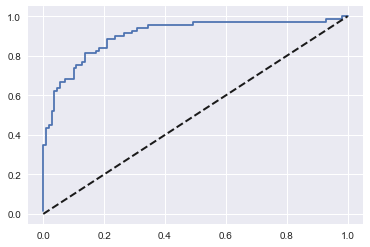

In [56]:
rf_best=grid.best_estimator_
y_score=rf_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
print("AUC: "+str(auc(fpr,tpr)))

#### Gradient Boosting 

In [57]:
param_grid={'n_estimators': range(50,250,50),
             'learning_rate': [0.1,0.5,0.7,1.0],
             'subsample':[0.5, 0.8],
             'max_depth':[3,10,15]}
grid=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_grid,scoring='roc_auc',cv=5,n_jobs=2)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_estimators': range(50, 250, 50), 'learning_rate': [0.1, 0.5, 0.7, 1.0], 'subsample': [0.5, 0.8], 'max_depth': [3, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [58]:
grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

AUC: 0.8974308300395257


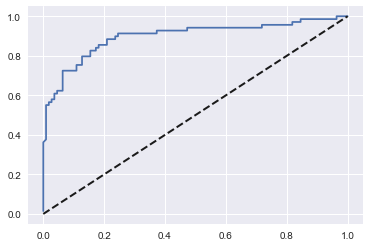

In [59]:
gb_best=grid.best_estimator_
y_score=gb_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
print("AUC: "+str(auc(fpr,tpr)))

#### Logistic Regression

In [60]:
param_grid={'C':[0.01,0.1,1,10,100],
            'penalty':['l1','l2']}
grid_search = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param_grid,
                           scoring = 'roc_auc', 
                           cv = 5
                          )
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'C': 1, 'penalty': 'l1'}

AUC: 0.8816864295125164


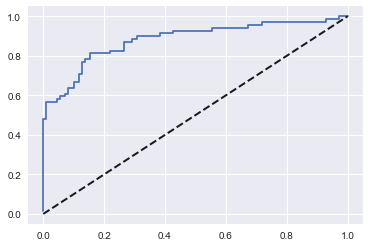

In [61]:
lg_best=grid_search.best_estimator_
y_score=lg_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
print("AUC: "+str(auc(fpr,tpr)))

#### Support Vector Machine

In [62]:
param_grid=[{'kernel':['rbf'],
            'gamma':[0.01,0.1],
            'C':[0.01,0.1,1,10],
            'coef0':[0.3,0.6,1.0]},
            {'kernel':['linear'],
            'C':[0.01,0.1,1,10]},
            {'kernel':['poly'],
            'C':[0.01,0.1,1,10],
            'gamma':[0.01,0.1],
            'coef0':[0.3,0.6,1.0]}
           ]
grid=GridSearchCV(estimator=SVC(probability=True),
                  param_grid=param_grid,
                  cv=5,
                  scoring='roc_auc',
                  n_jobs=2)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 10, 'kernel': 'linear'}

AUC: 0.8324110671936759


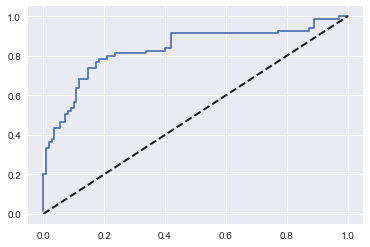

In [63]:
svm_best=grid.best_estimator_
y_score=svm_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
print("AUC: "+str(auc(fpr,tpr)))

#### Neural Network

AUC: 0.8624505928853755


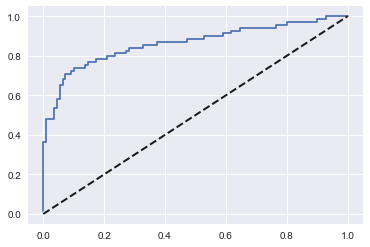

In [64]:
from sklearn.neural_network import MLPClassifier
neural_net=MLPClassifier(max_iter=300)
neural_net.fit(X_train,y_train)
y_score=neural_net.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
print("AUC: "+str(auc(fpr,tpr)))

#### Voting Classifier & Feature Selection
Use `SelectKBest` to select k best features.

AUC: 0.9030961791831357


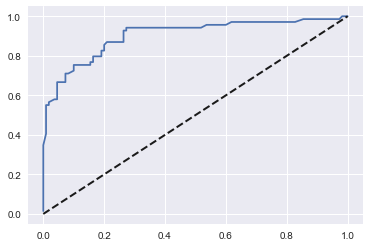

In [67]:
voting=VotingClassifier(estimators=[('lg',lg_best),
                                    ('grad',gb_best),
                                    ('rf',rf_best)],voting='soft')
anova_filter = SelectKBest(f_classif, k=7)
X_new=anova_filter.fit_transform(X_train,y_train)
new_test=anova_filter.transform(X_test)
voting.fit(X_new,y_train)
y_score=voting.predict_proba(new_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
print("AUC: "+str(auc(fpr,tpr)))

In [66]:
test.drop(['PassengerId'],axis=1,inplace=True)
new_test=anova_filter.transform(test)
y_pred=voting.predict(new_test)
submission = pd.DataFrame({
        "PassengerId": testId,
        "Survived": y_pred
    })
submission.to_csv('voting.csv',index=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
